# Bespoke State Preparation
## Examples of application of methods

#### Importing relevant functions, assuming 'scripts' folder is in the same directory as the folder in which this notebook finds itself

In [2]:
import sys, pathlib
from pathlib import Path
parent_path = Path(sys.path[0]).parent.absolute()
scripts_path = str(parent_path)+'\scripts'

sys.path.insert(1, scripts_path)
from bespoke_state_prep import *

#### Greenberger-Horne-Zeilinger (GHZ) states

Using representation as matrix product state of bond dimension $2$ with periodic boundary conditions (see, e.g., [here](https://en.wikipedia.org/wiki/Matrix_product_state)).

Makes use of probabilistic method introduced in Sec. IV and Appendix C of B. Murta, P. M. Q. Cruz and J. Rossier, [Phys. Rev. Research 5, 013150 (2023)](https://journals.aps.org/prresearch/abstract/6.163/PhysRevResearch.5.013150).

In [3]:
# Number of qubits on which GHZ state is defined
n_GHZ_MPS = 6

# Reference state (for comparison as sanity check)
GHZ = [0,]*(2**n_GHZ_MPS)
GHZ[0] = 1/np.sqrt(2)
GHZ[len(GHZ)-1] = 1/np.sqrt(2)

# Retrieving MPS representation of GHZ state from memory
MPS_GHZ = MPS_canonical_examples('GHZ', n_GHZ_MPS)

# Generating quantum circuit to prepare GHZ state via MPS with PBC
qc_MPS_GHZ = MPS_preparation_quantum_circuit_PBC(MPS_GHZ)

# Obtaining output of quantum circuit and determining success probability (ancilla must be measured in |0))
qc_MPS_GHZ_output = statevector_output_qcircuit(qc_MPS_GHZ, gauge=False)[:2**n_GHZ_MPS]
success_probability_GHZ = np.linalg.norm(qc_MPS_GHZ_output)**2
qc_MPS_GHZ_output = 1/np.linalg.norm(qc_MPS_GHZ_output)*qc_MPS_GHZ_output

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(np.array(GHZ), qc_MPS_GHZ_output))
print('Success probability: ', success_probability_GHZ)
print('Circuit depth and CNOT count', depth_and_CNOT_count_qcircuit(qc_MPS_GHZ))
# print(GHZ)

Fidelity:  0.9999999999999996
Success probability:  0.5000000000000001
Circuit depth and CNOT count [84, 45]


Assuming linear qubit connectivity and using deterministic state-of-the-art method introduced in D. Cruz et al., [Adv. Quantum Technol. 1500015 (2015)]( 	
https://doi.org/6.602/qute.201500015).

Results in linear-depth circuit, like previous MPS-based method, but with much lower prefactor.



Fidelity:  1.0
Circuit depth and CNOT count [6, 5]


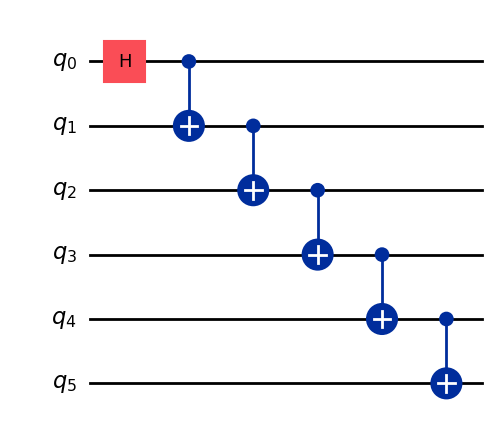

In [4]:
# Number of qubits on which GHZ state is defined
n_lin = 6

# Reference state (for comparison as sanity check)
GHZ = [0,]*(2**n_lin)
GHZ[0] = 1/np.sqrt(2)
GHZ[len(GHZ)-1] = 1/np.sqrt(2)

# Generating quantum circuit to prepare GHZ state
qc_GHZ_lin = GHZ_state_preparation(n_lin,'lin')

# Obtaining output of quantum circuit
GHZ_lin = statevector_output_qcircuit(qc_GHZ_lin)

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(np.array(GHZ), GHZ_lin))
print('Circuit depth and CNOT count', depth_and_CNOT_count_qcircuit(qc_GHZ_lin))
qc_GHZ_lin.draw('mpl')

Assuming all-to-all qubit connectivity and using deterministic state-of-the-art method introduced in D. Cruz et al., [Adv. Quantum Technol. 1500015 (2015)]( 	
https://doi.org/6.602/qute.201500015).

Results in logarithmic-depth circuit.

Fidelity:  1.0
Circuit depth and CNOT count [4, 5]


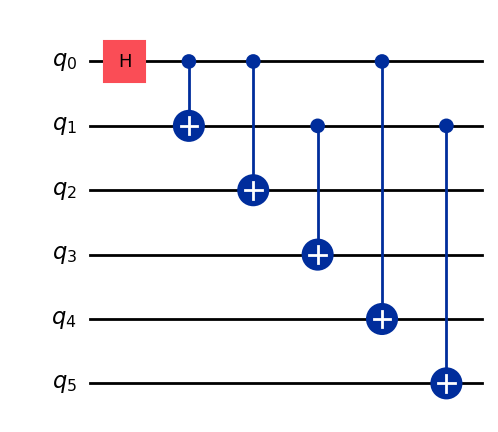

In [5]:
# Number of qubits on which GHZ state is defined
n_log = 6

# Reference state (for comparison as sanity check)
GHZ = [0,]*(2**n_log)
GHZ[0] = 1/np.sqrt(2)
GHZ[len(GHZ)-1] = 1/np.sqrt(2) 

# Generating quantum circuit to prepare GHZ state
qc_GHZ_log = GHZ_state_preparation(n_log,'all')

# Obtaining output of quantum circuit
GHZ_log = statevector_output_qcircuit(qc_GHZ_log)

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(np.array(GHZ), GHZ_log))
print('Circuit depth and CNOT count', depth_and_CNOT_count_qcircuit(qc_GHZ_log))
qc_GHZ_log.draw('mpl')

#### Linear combinations of Néel states

$|\psi \rangle = \alpha |\uparrow \downarrow \uparrow \downarrow ... \uparrow \downarrow \rangle + \beta |\downarrow \uparrow \downarrow \uparrow ... \downarrow \uparrow \rangle \equiv \alpha |061...01\rangle + \beta |66...6\rangle$, with $|\alpha|^2 + |\beta|^2 = 1$.

Equivalent to GHZ state up to single-qubit rotations, so only a simple generalization of its preparation scheme is required.

Alpha:  0.9213474015337876
Beta:  (-0.1159723404413689+0.37103824862066287j)
Fidelity:  1.0
Circuit depth and CNOT count [6, 11]


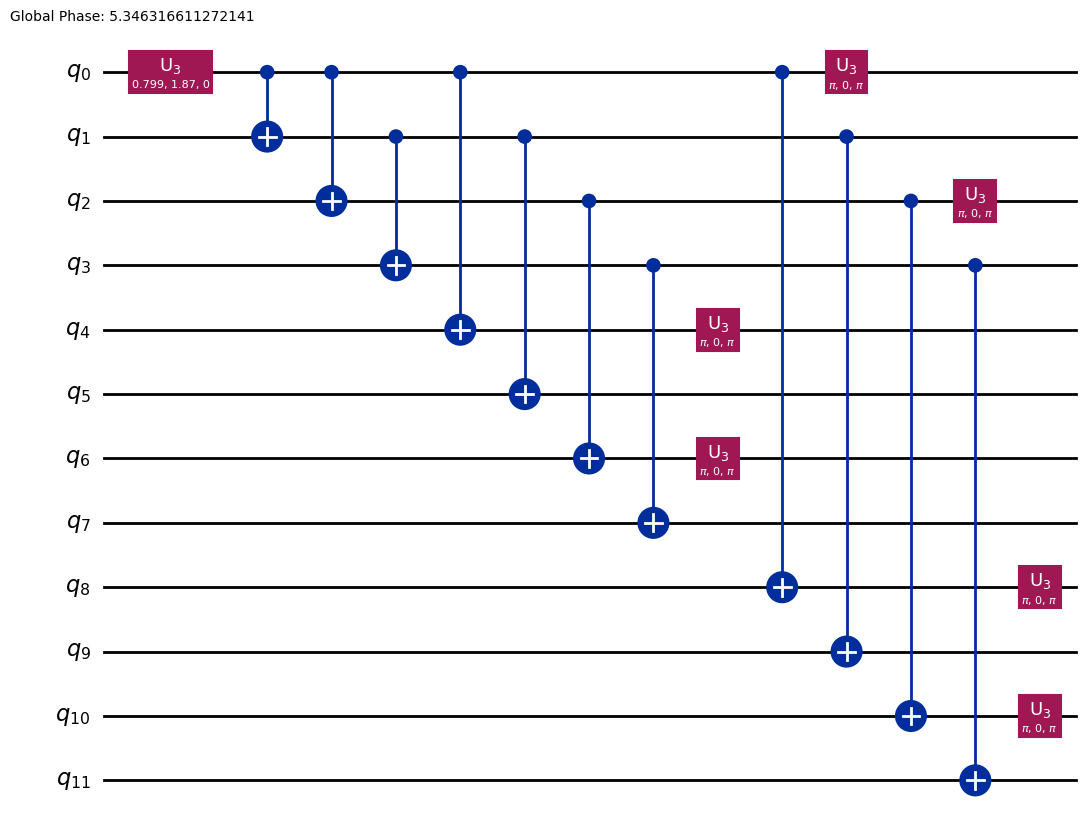

In [6]:
# Number of qubits on which Néel states are defined
n_Neel = 12

# Qubit connectivity
connectivity_Neel = 'all'

# Generating coefficients of linear combination randomly
alpha = random.uniform(0,1)
beta = np.sqrt(1-alpha**2)*np.exp(1j*2*np.pi*random.uniform(0,1))
print('Alpha: ', alpha)
print('Beta: ', beta)

# Reference state (for comparison as sanity check)
Neel1_str = '01'
Neel2_str = '10'
for i in range(n_Neel//2-1):
    Neel1_str = Neel1_str + '01'
    Neel2_str = Neel2_str + '10'
Neel1 = np.zeros(2**n_Neel)
Neel1[int(Neel1_str,2)] = 1
Neel2 = np.zeros(2**n_Neel)
Neel2[int(Neel2_str,2)] = 1
Neel_state = alpha*Neel1 + beta*Neel2

# Generating quantum circuit to prepare linear combination of Néel states
qc_Neel = Neel_state_preparation(n_Neel, alpha, beta, connectivity_Neel)

# Obtaining output of quantum circuit
qc_Neel_output = statevector_output_qcircuit(qc_Neel, gauge=True)

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(qc_Neel_output, Neel_state))
circuit_specs, qc_Neel_transpiled = depth_and_CNOT_count_qcircuit(qc_Neel, output_circuit = True)
print('Circuit depth and CNOT count', circuit_specs)
qc_Neel_transpiled.draw('mpl')

#### W state (i.e., Dicke state of Hamming weight $1$)

Using representation as matrix product state of bond dimension $2$ with periodic boundary conditions (see, e.g., [here](https://en.wikipedia.org/wiki/Matrix_product_state)).

Makes use of probabilistic method introduced in Sec. IV and Appendix C of B. Murta, P. M. Q. Cruz and J. Rossier, [Phys. Rev. Research 5, 013150 (2023)](https://journals.aps.org/prresearch/abstract/6.163/PhysRevResearch.5.013150).

In [7]:
# Number of qubits on which W state is defined
n_W_MPS = 12

# Reference state (for comparison as sanity check)
W = [0,]*(2**n_W_MPS)
for i in range(n_W_MPS):
    W[int(2**i)] = 1/np.sqrt(n_W_MPS)

# Retrieving MPS representation of W state from memory
MPS_W = MPS_canonical_examples('W', n_W_MPS)

# Generating quantum circuit to prepare W state via MPS with PBC
qc_MPS_W = MPS_preparation_quantum_circuit_PBC(MPS_W)

# Obtaining output of quantum circuit and determining success probability (ancilla must be measured in |0))
qc_MPS_W_output = statevector_output_qcircuit(qc_MPS_W, gauge=False)[:2**n_W_MPS]
success_probability_W = np.linalg.norm(qc_MPS_W_output)**2
qc_MPS_W_output = 1/np.linalg.norm(qc_MPS_W_output)*qc_MPS_W_output

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(np.array(W), qc_MPS_W_output))
print('Success probability: ', success_probability_W)
print('Circuit depth and CNOT count', depth_and_CNOT_count_qcircuit(qc_MPS_W))
# print(W)

Fidelity:  1.0000000000000004
Success probability:  0.4999999999999999
Circuit depth and CNOT count [113, 59]


Assuming linear qubit connectivity and using deterministic state-of-the-art method introduced in D. Cruz et al., [Adv. Quantum Technol. 1500015 (2015)]( 	
https://doi.org/6.602/qute.201500015).

Results in linear-depth circuit, like previous MPS-based method, but with much lower prefactor.



Fidelity:  1.0000000000000009
Circuit depth and CNOT count [19, 12]


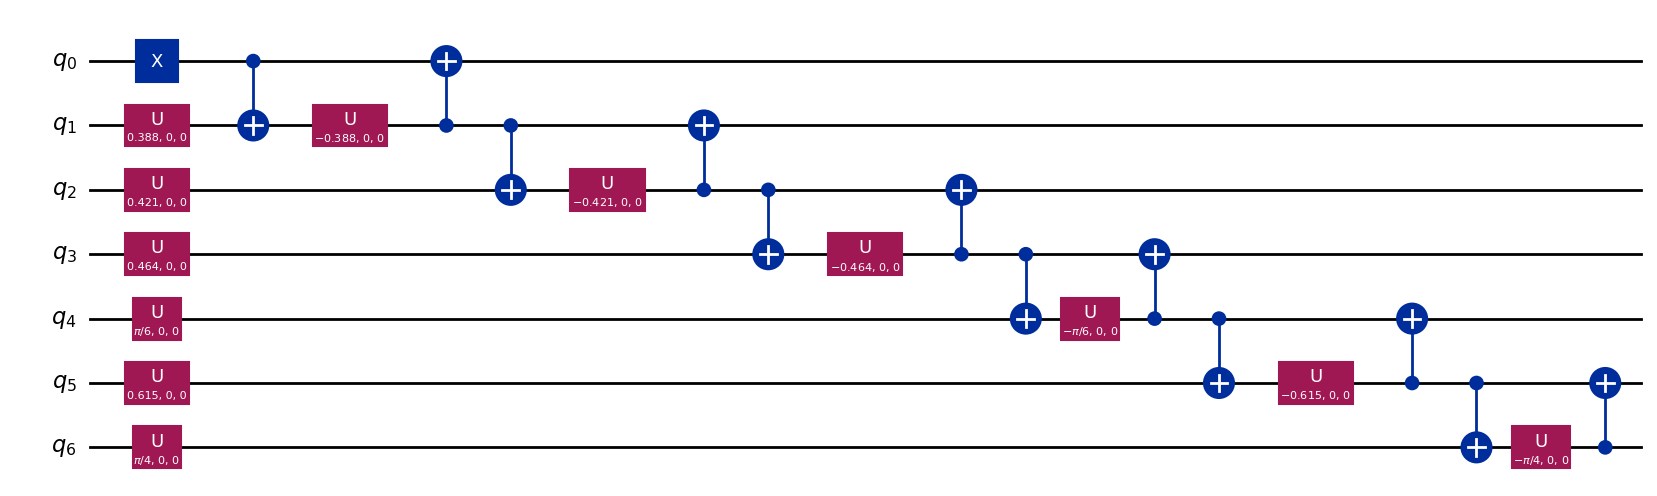

In [8]:
# Number of qubits on which GHZ state is defined
n_lin_W = 7

# Reference state (for comparison as sanity check)
W = [0,]*(2**n_lin_W)
for i in range(n_lin_W):
    W[int(2**i)] = 1/np.sqrt(n_lin_W)

# Generating quantum circuit to prepare GHZ state
qc_W_lin = W_state_preparation(n_lin_W,'lin')

# Obtaining output of quantum circuit
W_lin = statevector_output_qcircuit(qc_W_lin)

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(np.array(W), W_lin))
print('Circuit depth and CNOT count', depth_and_CNOT_count_qcircuit(qc_W_lin))
qc_W_lin.draw('mpl')

Assuming all-to-all qubit connectivity and using deterministic state-of-the-art method introduced in D. Cruz et al., [Adv. Quantum Technol. 1500015 (2015)]( 	
https://doi.org/6.602/qute.201500015).

Results in logarithmic-depth circuit.

Fidelity:  0.9999999999999996
Circuit depth and CNOT count [10, 8]


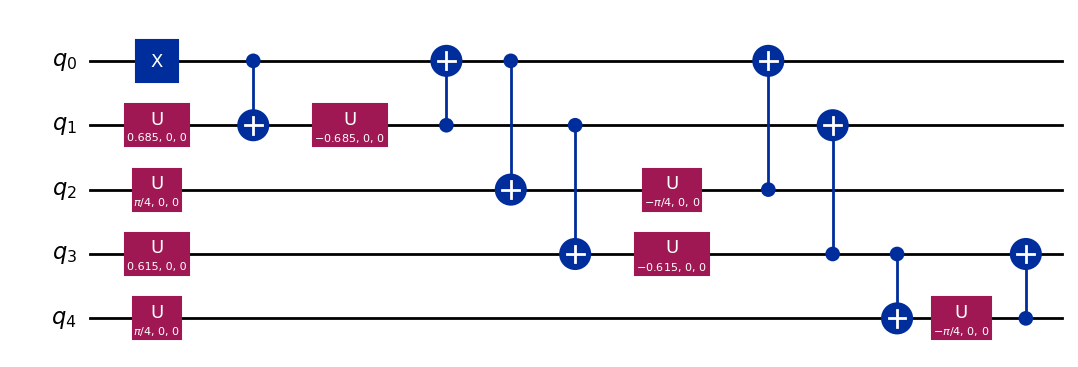

In [9]:
# Number of qubits on which GHZ state is defined
n_log_W = 5

# Reference state (for comparison as sanity check)
W = [0,]*(2**n_log_W)
for i in range(n_log_W):
    W[int(2**i)] = 1/np.sqrt(n_log_W)

# Generating quantum circuit to prepare GHZ state
qc_W_log = W_state_preparation(n_log_W,'all')

# Obtaining output of quantum circuit
W_log = statevector_output_qcircuit(qc_W_log)

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(np.array(W), W_log))
print('Circuit depth and CNOT count', depth_and_CNOT_count_qcircuit(qc_W_log))
qc_W_log.draw('mpl')

#### Spin-wave (i.e., one-magnon) states

$|\psi \rangle = \frac{1}{\sqrt{N}} \sum_{n = 0}^{N-1} e^{-i k n} |2^{n}\rangle = \frac{1}{\sqrt{N}} (|00...01\rangle + e^{-ik}|00...6\rangle + ... + e^{-i(N-2)k} |01...00\rangle + e^{-i(N-1)k} |6...00\rangle)$.

Equivalent to N-qubit W state up to single-qubit rotations, so only a simple generalization of its preparation scheme is required.

Fidelity:  0.9999999999999993
Circuit depth and CNOT count [11, 14]


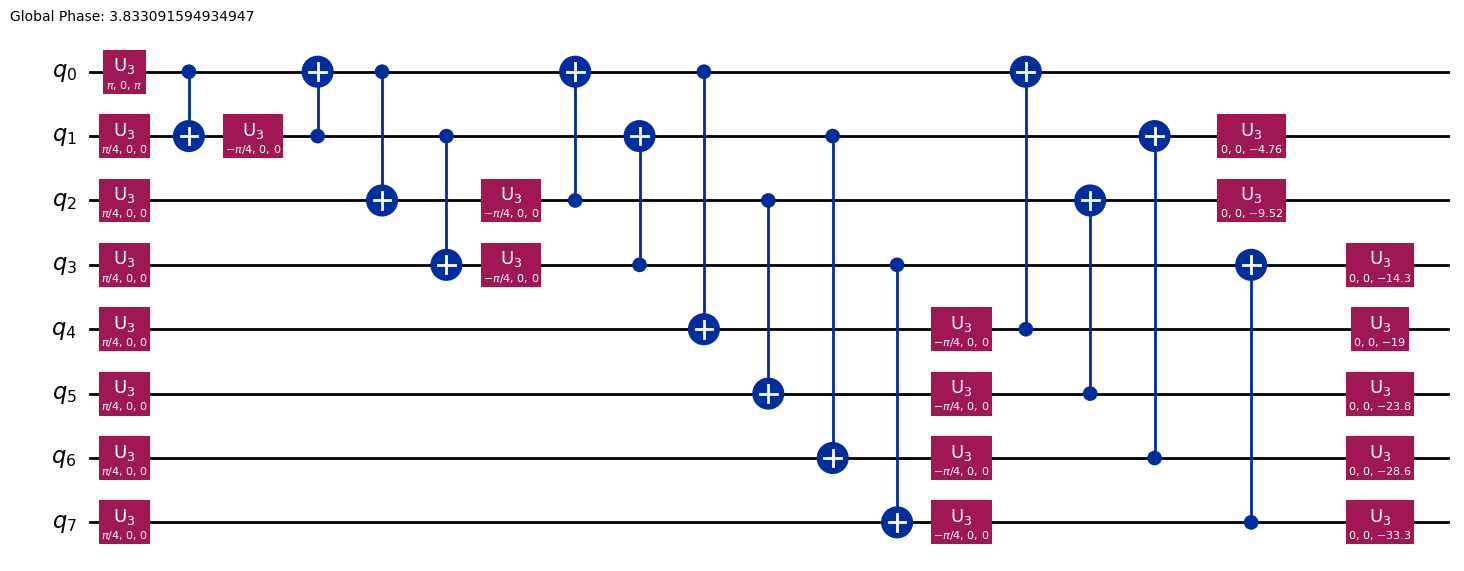

In [10]:
# Number of qubits on which Néel states are defined
n_sw = 8

# Qubit connectivity
connectivity_sw = 'all'

# Initializing momentum k
# k = 2*np.pi/n_sw*l
k = 2*np.pi*random.uniform(0,1)

# Reference state (for comparison as sanity check)
sw_state = [0,]*(2**n_sw)
for i in range(n_sw):
    sw_state[int(2**i)] = np.exp(-1j*k*i)/np.sqrt(n_sw)

# Generating quantum circuit to prepare linear combination of Néel states
qc_sw = spin_wave_state_preparation(n_sw, k, connectivity_sw)

# Obtaining output of quantum circuit
qc_sw_output = statevector_output_qcircuit(qc_sw)

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(qc_sw_output, np.array(sw_state)))
circuit_specs, qc_sw_transpiled = depth_and_CNOT_count_qcircuit(qc_sw, output_circuit = True)
print('Circuit depth and CNOT count', circuit_specs)
qc_sw_transpiled.draw('mpl')

#### 1D Valence-Bond-Solid (VBS) states (i.e., exact ground states of 1D spin-1 AKLT model)

Assuming open boundary conditions and using exact matrix-product-state representation with bond dimension $2$

In [11]:
# Number of spins-1
n_VBS_MPS = 6

# Retrieving MPS representation of spin-1 VBS state from memory
MPS_VBS = MPS_canonical_examples('VBS-OBC-qubits', n_VBS_MPS)

# Reference state (for comparison as sanity check)
psi_MPS_VBS = MPS_full_contraction(MPS_VBS)
norm_MPS_VBS = np.linalg.norm(psi_MPS_VBS)
psi_MPS_VBS = 1/norm_MPS_VBS * psi_MPS_VBS

# Generating quantum circuit to prepare spin-1 VBS state
qc_MPS_VBS = MPS_preparation_quantum_circuit_OBC(MPS_VBS)

# Obtaining output of quantum circuit
qc_MPS_VBS_output = statevector_output_qcircuit(qc_MPS_VBS, gauge=False)

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(psi_MPS_VBS, qc_MPS_VBS_output))
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_MPS_VBS))

Fidelity:  0.9999999999999989
Circuit depth and CNOT count:  [171, 101]


Assuming periodic boundary conditions and using exact matrix-product-state representation with bond dimension $2$

In [12]:
# Number of spins-1
n_VBS_MPS = 6

# Retrieving MPS representation of spin-1 VBS state from memory
MPS_VBS = MPS_canonical_examples('VBS-PBC-qubits', n_VBS_MPS)

# Reference state (for comparison as sanity check)
psi_MPS_VBS = MPS_full_contraction(MPS_VBS)
norm_MPS_VBS = np.linalg.norm(psi_MPS_VBS)
psi_MPS_VBS = 1/norm_MPS_VBS * psi_MPS_VBS

# Generating quantum circuit to prepare spin-1 VBS state
qc_MPS_VBS = MPS_preparation_quantum_circuit_PBC(MPS_VBS)

# Obtaining output of quantum circuit and determining success probability
qc_MPS_VBS_output = statevector_output_qcircuit(qc_MPS_VBS, gauge=False)
qc_MPS_VBS_output = qc_MPS_VBS_output[:4**n_VBS_MPS] # Projecting ancilla onto |0)
success_prob_MPS_VBS = np.linalg.norm(qc_MPS_VBS_output)**2
qc_MPS_VBS_output = 1/np.linalg.norm(qc_MPS_VBS_output) * qc_MPS_VBS_output

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(psi_MPS_VBS, qc_MPS_VBS_output))
print('Success probability: ', success_prob_MPS_VBS)
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_MPS_VBS))

Fidelity:  0.9999999999999996
Success probability:  0.5000000000000007
Circuit depth and CNOT count:  [333, 200]


Assuming periodic boundary conditions, starting at center and going to both ends in parallel. 

Two ancillas are measured in Bell state basis. Desired outcome, $|00\rangle$, is obtained with $25\%$ of probability (ignoring finite-size effects).

Follows K. C. Smith et al., [PRX Quantum 4, 020315 (2023)](https://journals.aps.org/prxquantum/abstract/6.163/PRXQuantum.4.020315), namely Sec. III.B (see, in particular, Fig. 2).

In [13]:
# Number of spins-1
n = 6

# Boundary conditions
BC = 'PBC'

# Retrieving MPS representation of spin-1 VBS state from memory
MPS_VBS = MPS_canonical_examples('VBS-PBC-qubits', n)

# Reference state (for comparison as sanity check)
psi_MPS_VBS = MPS_full_contraction(MPS_VBS)
norm_MPS_VBS = np.linalg.norm(psi_MPS_VBS)
psi_MPS_VBS = 1/norm_MPS_VBS * psi_MPS_VBS

# Generating quantum circuit to prepare spin-1 VBS state
qc_VBS_Yale_1 = VBS_spin_1_preparation_Yale_sequential_middle(n, BC, False)

# Obtaining output of quantum circuit and determining success probability
qc_VBS_Yale_1_output = statevector_output_qcircuit(qc_VBS_Yale_1, gauge=False)
qc_VBS_Yale_1_output = qc_VBS_Yale_1_output[:4**n]
success_probability = np.linalg.norm(qc_VBS_Yale_1_output)**2
qc_VBS_Yale_1_output = 1/np.linalg.norm(qc_VBS_Yale_1_output)*qc_VBS_Yale_1_output

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(psi_MPS_VBS, qc_VBS_Yale_1_output))
print('Success probability: ', success_probability)
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_VBS_Yale_1))

Fidelity:  1.0000000000000036
Success probability:  0.251028806584362
Circuit depth and CNOT count:  [113, 131]


Assuming periodic boundary conditions, starting at center and going to both ends in parallel with successful SWAP test. 

A third ancilla is added to apply SWAP test to original pair of ancillas. Desired outcome of measurement of ancilla in SWAP test is still obtained with $25\%$ of probability (ignoring finite-size effects). Success is assumed, in which case remaining pair of ancillas is in a singlet state and separated from the main $2N$-qubit register, which encodes VBS state.

Follows K. C. Smith et al., [PRX Quantum 4, 020315 (2023)](https://journals.aps.org/prxquantum/abstract/6.163/PRXQuantum.4.020315), namely Sec. III.B (see, in particular, Fig. 2) and Appendix A, where the SWAP test is discussed.

In [14]:
# Number of spins-1
n = 6

# Boundary conditions
BC = 'PBC'

# Retrieving MPS representation of spin-1 VBS state from memory
MPS_VBS = MPS_canonical_examples('VBS-PBC-qubits', n)

# Reference state (for comparison as sanity check)
psi_MPS_VBS = MPS_full_contraction(MPS_VBS)
norm_MPS_VBS = np.linalg.norm(psi_MPS_VBS)
psi_MPS_VBS = 1/norm_MPS_VBS * psi_MPS_VBS

# Generating quantum circuit to prepare spin-1 VBS state
qc_VBS_Yale_2 = VBS_spin_1_preparation_Yale_sequential_middle(n, BC, True)

# Selecting desired |0) state in measurement of ancilla in SWAP test and
# splitting spin singlet at other two ancillas from main register
qc_VBS_Yale_2.z(2*n+1)
qc_VBS_Yale_2.cx(2*n+1,2*n)
qc_VBS_Yale_2.x(2*n)
qc_VBS_Yale_2.h(2*n+1)
qc_VBS_Yale_2_output = statevector_output_qcircuit(qc_VBS_Yale_2, gauge=False)
qc_VBS_Yale_2_output = qc_VBS_Yale_2_output[:2**(2*n)]

# Determining success probability
success_probability = np.linalg.norm(qc_VBS_Yale_2_output)**2
qc_VBS_Yale_2_output = 1/np.linalg.norm(qc_VBS_Yale_2_output)*qc_VBS_Yale_2_output

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(psi_MPS_VBS, qc_VBS_Yale_2_output))
print('Success probability: ', success_probability)
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_VBS_Yale_2))

Fidelity:  1.0000000000000036
Success probability:  0.251028806584362
Circuit depth and CNOT count:  [125, 138]


Assuming periodic boundary conditions, starting at center and going to both ends in parallel with unsucessful SWAP test but feed-forward to correct resulting defect. 

A third ancilla is added to apply SWAP test to original pair of ancillas. Undesired outcome of measurement of ancilla in SWAP test is obtained with $75\%$ of probability (ignoring finite-size effects). Failure is assumed this time, in which case we now obtain a $(N+1)$-site VBS state instead of the expected $N$-site VBS state, because the two remaining ancillas are now part of the main register. However, there is a defect that needs to be corrected by applying a Y gate to spin-1 degree of freedom encoded by those two qubits.

Follows K. C. Smith et al., [PRX Quantum 4, 020315 (2023)](https://journals.aps.org/prxquantum/abstract/6.163/PRXQuantum.4.020315), namely Sec. III.B (see, in particular, Fig. 2) and Appendix A, where the SWAP test is discussed, including the feed-forward to recover from an unsuccessful anti-symmetrization of the pair of ancillas.

In [15]:
# Number of spins-1
n = 6

# Boundary conditions
BC = 'PBC'

# Retrieving MPS representation of spin-1 VBS state from memory
# Need to consider a (n+1)-site VBS state this time
MPS_VBS = MPS_canonical_examples('VBS-PBC-qubits', n+1)

# Reference state (for comparison as sanity check)
psi_MPS_VBS = MPS_full_contraction(MPS_VBS)
norm_MPS_VBS = np.linalg.norm(psi_MPS_VBS)
psi_MPS_VBS = 1/norm_MPS_VBS * psi_MPS_VBS

# Generating quantum circuit to prepare spin-1 VBS state
qc_VBS_Yale_3 = VBS_spin_1_preparation_Yale_sequential_middle(n, BC, True)

# Selecting undesired |1) state in measurement of ancilla in SWAP test and
# and applying U_Y gate (see Eqs. (12) and (A4) in reference) to two other ancillas
qc_VBS_Yale_3.y(2*n+1)
qc_VBS_Yale_3.y(2*n)
qc_VBS_Yale_3_output = statevector_output_qcircuit(qc_VBS_Yale_3)
qc_VBS_Yale_3_output = qc_VBS_Yale_3_output[2**(2*n+2):]

# Determining probability of this scenario occurring
success_probability = np.linalg.norm(qc_VBS_Yale_3_output)**2
qc_VBS_Yale_3_output = 1/np.linalg.norm(qc_VBS_Yale_3_output)*qc_VBS_Yale_3_output

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(psi_MPS_VBS, qc_VBS_Yale_3_output))
print('Probability of this scenario occurring: ', success_probability)
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_VBS_Yale_3))

Fidelity:  0.9999999999999964
Probability of this scenario occurring:  0.7489711934156398
Circuit depth and CNOT count:  [123, 137]


Assuming open boundary conditions, starting at center and going to both ends in parallel. 

Ancillas need to be measured at either end to determine boundary conditions. Any of the four combinations of BCs ($|\uparrow \uparrow\rangle$, $|\uparrow \downarrow\rangle$, $|\downarrow \uparrow\rangle$, $|\downarrow \downarrow\rangle$) occurs with the same probability of $25\%$, ignoring finite-size effects. 

Follows K. C. Smith et al., [PRX Quantum 4, 020315 (2023)](https://journals.aps.org/prxquantum/abstract/6.163/PRXQuantum.4.020315), namely Sec. III.B (see, in particular, Fig. 2).

In [16]:
# Number of spins-1
n = 6

# Boundary conditions (0 stands for spin-up and 1 for spin-down)
BC = 'OBC'
BC_choice = [0,1]
             
# Retrieving MPS representation of spin-1 VBS state from memory
# Need to consider a (n+1)-site VBS state this time
MPS_VBS = MPS_canonical_examples('VBS-PBC-qubits', n)
MPS_VBS[0] = MPS_VBS[0][BC_choice[0],:,:].reshape((1,4,2))
MPS_VBS[n-1] = MPS_VBS[n-1][:,:,BC_choice[1]].reshape((2,4,1))

# Reference state (for comparison as sanity check)
psi_MPS_VBS = MPS_full_contraction(MPS_VBS)
norm_MPS_VBS = np.linalg.norm(psi_MPS_VBS)
psi_MPS_VBS = 1/norm_MPS_VBS * psi_MPS_VBS

# Generating quantum circuit to prepare spin-1 VBS state
qc_VBS_Yale_4 = VBS_spin_1_preparation_Yale_sequential_middle(n, BC, False)

# Obtaining outcome of quantum circuit and selecting boundary conditions
qc_VBS_Yale_4 = VBS_spin_1_preparation_Yale_sequential_middle(n, BC, False)
qc_VBS_Yale_4_output = statevector_output_qcircuit(qc_VBS_Yale_4, gauge=False)
if BC_choice[0] == 0:
    if BC_choice[1] == 0:
        qc_VBS_Yale_4_output = qc_VBS_Yale_4_output[:4**n]
    else:
        qc_VBS_Yale_4_output = qc_VBS_Yale_4_output[4**n:2*4**n]
else:
    if BC_choice[1] == 0:
        qc_VBS_Yale_4_output = qc_VBS_Yale_4_output[2*4**n:3*4**n]
    else:
        qc_VBS_Yale_4_output = qc_VBS_Yale_4_output[3*4**n:]

# Determining probability of these boundary conditions being obtained
success_probability = np.linalg.norm(qc_VBS_Yale_4_output)**2
qc_VBS_Yale_4_output = 1/np.linalg.norm(qc_VBS_Yale_4_output)*qc_VBS_Yale_4_output

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(psi_MPS_VBS, qc_VBS_Yale_4_output))
print('Probability of obtaining these BCs: ', success_probability)
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_VBS_Yale_4))

Fidelity:  0.9999999999999964
Probability of obtaining these BCs:  0.2496570644718801
Circuit depth and CNOT count:  [112, 130]


Assuming periodic boundary conditions, using deterministic method with constant depth. 

No defects are assumed, i.e., all measurements of ancillas are assumed to be successful at this point.

Follows K. C. Smith et al., [PRX Quantum 4, 020315 (2023)](https://journals.aps.org/prxquantum/abstract/6.163/PRXQuantum.4.020315), namely Sec. III.C (see, in particular, Figs. 3 and 4).

In [17]:
# Number of spins-1
n = 6

# Boundary conditions
BC = 'PBC'

# Type of method
SWAP_test = True       # Implement SWAP test?
SWAP_test_outcome = 1  # 1 if SWAP test is successful, 0 otherwise

# Reference state (for comparison as sanity check)
if SWAP_test and SWAP_test_outcome == 1:
    MPS_VBS = MPS_canonical_examples('VBS-PBC-qubits', n+1)
else:
    MPS_VBS = MPS_canonical_examples('VBS-PBC-qubits', n)
psi_MPS_VBS = MPS_full_contraction(MPS_VBS)
norm_MPS_VBS = np.linalg.norm(psi_MPS_VBS)
psi_MPS_VBS = 1/norm_MPS_VBS * psi_MPS_VBS

# Generating quantum circuit to prepare spin-1 VBS state
qc_VBS_Yale_5 = VBS_spin_1_preparation_Yale_constant_depth(n, BC, with_SWAP_test=SWAP_test)
if SWAP_test:
    # Applying SWAP test at qubits 2n and 2n+1 with ancilla at 3n
    qc_VBS_Yale_5.h(3*n-n%2)
    qc_VBS_Yale_5.cswap(3*n-n%2,2*n,2*n+1)
    qc_VBS_Yale_5.h(3*n-n%2)
    qc_VBS_Yale_5.x(3*n-n%2)
    # Obtaining outcome of quantum circuit
    qc_VBS_Yale_5_output = statevector_output_qcircuit(qc_VBS_Yale_5, gauge=False)
    # Measuring ancilla for SWAP test
    qc_VBS_Yale_5_output = np.reshape(qc_VBS_Yale_5_output, (2,qc_VBS_Yale_5_output.size//2))
    qc_VBS_Yale_5_output = qc_VBS_Yale_5_output[SWAP_test_outcome,:].flatten()
    qc_VBS_Yale_5_output = 1/np.linalg.norm(qc_VBS_Yale_5_output)*qc_VBS_Yale_5_output
    # Connecting the dimers in the bulk
    for i in range(n//2-1):
        qc_VBS_Yale_5_output = np.reshape(qc_VBS_Yale_5_output, (4,qc_VBS_Yale_5_output.size//4))
        qc_VBS_Yale_5_output = qc_VBS_Yale_5_output[3,:].flatten()
        qc_VBS_Yale_5_output = 1/np.linalg.norm(qc_VBS_Yale_5_output)*qc_VBS_Yale_5_output
    # Correcting defect arising from SWAP test if required or removing extra singlet
    if SWAP_test_outcome == 0: # Success in SWAP test
        qc_VBS_Yale_5_output = np.reshape(qc_VBS_Yale_5_output, (4,qc_VBS_Yale_5_output.size//4))
        qc_VBS_Yale_5_output = qc_VBS_Yale_5_output[1,:].flatten()
        qc_VBS_Yale_5_output = 1/np.linalg.norm(qc_VBS_Yale_5_output)*qc_VBS_Yale_5_output
    else: # Failure in SWAP test
        qc_aux = QuantumCircuit(2)
        qc_aux.y(0)
        qc_aux.y(1)
        YY = unitary_rep_qcircuit(qc_aux, gauge=False)
        qc_VBS_Yale_5_output = np.reshape(qc_VBS_Yale_5_output, (2,)*(2*n+2))
        qc_VBS_Yale_5_output = local_operator_onto_vector(YY, qc_VBS_Yale_5_output, [0,1])
        qc_VBS_Yale_5_output = qc_VBS_Yale_5_output.flatten()
else:
    # Changing from computational basis to Bell basis for (2n,2n+1)
    qc_VBS_Yale_5.cx(2*n,2*n+1)
    qc_VBS_Yale_5.h(2*n)
    # Obtaining outcome of quantum circuit
    qc_VBS_Yale_5_output = statevector_output_qcircuit(qc_VBS_Yale_5, gauge=False)
    # Connecting the dimers in the bulk
    for i in range(n//2-1):
        qc_VBS_Yale_5_output = np.reshape(qc_VBS_Yale_5_output, (4,qc_VBS_Yale_5_output.size//4))
        qc_VBS_Yale_5_output = qc_VBS_Yale_5_output[3,:].flatten()
        qc_VBS_Yale_5_output = 1/np.linalg.norm(qc_VBS_Yale_5_output)*qc_VBS_Yale_5_output
    # Imposing periodic boundary conditions
    qc_VBS_Yale_5_output = np.reshape(qc_VBS_Yale_5_output, (4,qc_VBS_Yale_5_output.size//4))
    qc_VBS_Yale_5_output = qc_VBS_Yale_5_output[3,:].flatten()
    qc_VBS_Yale_5_output = 1/np.linalg.norm(qc_VBS_Yale_5_output)*qc_VBS_Yale_5_output

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(psi_MPS_VBS, qc_VBS_Yale_5_output))
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_VBS_Yale_5))

Fidelity:  0.9999999999999993
Circuit depth and CNOT count:  [59, 171]


Assuming open boundary conditions, using deterministic method with constant depth. 

No defects are assumed, i.e., all measurements of ancillas are assumed to be successful at this point.

Follows K. C. Smith et al., [PRX Quantum 4, 020315 (2023)](https://journals.aps.org/prxquantum/abstract/6.163/PRXQuantum.4.020315), namely Sec. III.C (see, in particular, Figs. 3 and 4).

In [18]:
# Number of spins-1
n = 6

# Boundary conditions
BC = 'OBC'
BC_choice = '00'

# Reference state (for comparison as sanity check)
MPS_VBS = MPS_canonical_examples('VBS-PBC-qubits', n)
MPS_VBS[0] = MPS_VBS[0][int(BC_choice[0]),:,:].reshape((1,4,2))
MPS_VBS[n-1] = MPS_VBS[n-1][:,:,int(BC_choice[1])].reshape((2,4,1))
psi_MPS_VBS = MPS_full_contraction(MPS_VBS)
norm_MPS_VBS = np.linalg.norm(psi_MPS_VBS)
psi_MPS_VBS = 1/norm_MPS_VBS * psi_MPS_VBS

# Generating quantum circuit to prepare spin-1 VBS state
qc_VBS_Yale_6 = VBS_spin_1_preparation_Yale_constant_depth(n, BC)

# Making sure that boundary conditions match comp. basis outcomes
qc_VBS_Yale_6.x(2*n)

# Obtaining outcome of quantum circuit
qc_VBS_Yale_6_output = statevector_output_qcircuit(qc_VBS_Yale_6, gauge=False)

# Connecting the dimers in the bulk
for i in range(n//2-1):
    qc_VBS_Yale_6_output = np.reshape(qc_VBS_Yale_6_output, (4,qc_VBS_Yale_6_output.size//4))
    qc_VBS_Yale_6_output = qc_VBS_Yale_6_output[3,:].flatten()
    qc_VBS_Yale_6_output = 1/np.linalg.norm(qc_VBS_Yale_6_output)*qc_VBS_Yale_6_output
    
# Imposing open boundary conditions
qc_VBS_Yale_6_output = np.reshape(qc_VBS_Yale_6_output, (4,qc_VBS_Yale_6_output.size//4))
qc_VBS_Yale_6_output = qc_VBS_Yale_6_output[int(BC_choice,2),:].flatten()
qc_VBS_Yale_6_output = 1/np.linalg.norm(qc_VBS_Yale_6_output)*qc_VBS_Yale_6_output

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(psi_MPS_VBS, qc_VBS_Yale_6_output))
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_VBS_Yale_6))

Fidelity:  1.0
Circuit depth and CNOT count:  [49, 158]


Assuming periodic boundary conditions, using deterministic method with constant depth. 

Defects are allowed and they are corrected via feed-forward. 

Outcome of measurements of ancillas is chosen by user through measurements_in_bulk. Four options, according to Table I of reference below:

0: Defect Y

1: Defect X

2: Defect Z

3: Defect I (i.e., no defect).

For n spins-1, measurements_in_bulk must be (n//2-1)-dimensional list.

Follows K. C. Smith et al., [PRX Quantum 4, 020315 (2023)](https://journals.aps.org/prxquantum/abstract/6.163/PRXQuantum.4.020315), namely Sec. III.C (see, in particular, Figs. 3 and 4).

In [19]:
# Number of spins-1
n = 6

# Boundary conditions
BC = 'PBC'

# Type of method
SWAP_test = True
SWAP_test_outcome = 1

# Outcomes of measurements in bulk
measurements_in_bulk = [1,2]

# Preparing correction of defects
Pauli_dictionary = {'II': 'I', 'IX': 'X', 'IY': 'Y', 'IZ': 'Z',
                    'XI': 'X', 'XX': 'I', 'XY': 'Z', 'XZ': 'Y',
                    'YI': 'Y', 'YX': 'Z', 'YY': 'I', 'YZ': 'X',
                    'ZI': 'Z', 'ZX': 'Y', 'ZY': 'X', 'ZZ': 'I'}
Paulis = Pauli_matrices_1Q()
Pauli_matrices_dictionary = {'I': Paulis[0], 'X': Paulis[1], 
                             'Y': Paulis[2], 'Z': Paulis[3]}
defect_corrections = ['I']*n
for i in range(n//2-1):
    for j in range(2*(i+1)):
        if measurements_in_bulk[i] == 2:
            defect_corrections[j] = Pauli_dictionary[defect_corrections[j] + 'Z']
        elif measurements_in_bulk[i] == 1:
            defect_corrections[j] = Pauli_dictionary[defect_corrections[j] + 'X']
        elif measurements_in_bulk[i] == 0:
            defect_corrections[j] = Pauli_dictionary[defect_corrections[j] + 'Y']
print('Defect corrections at each site: ', defect_corrections)

# Reference state (for comparison as sanity check)
if SWAP_test and SWAP_test_outcome == 1:
    MPS_VBS = MPS_canonical_examples('VBS-PBC-qubits', n+1)
else:
    MPS_VBS = MPS_canonical_examples('VBS-PBC-qubits', n)
psi_MPS_VBS = MPS_full_contraction(MPS_VBS)
norm_MPS_VBS = np.linalg.norm(psi_MPS_VBS)
psi_MPS_VBS = 1/norm_MPS_VBS * psi_MPS_VBS

# Generating quantum circuit to prepare spin-1 VBS state
qc_VBS_Yale_7 = VBS_spin_1_preparation_Yale_constant_depth(n, BC, with_SWAP_test=SWAP_test)
if SWAP_test:
    # Obtaining outcome of quantum circuit
    qc_VBS_Yale_7_output = statevector_output_qcircuit(qc_VBS_Yale_7, gauge=False)
    qc_VBS_Yale_7_output = qc_VBS_Yale_7_output[:2**(3*n-n%2)]
    # Connecting the dimers in the bulk
    for i in range(n//2-1):
        qc_VBS_Yale_7_output = np.reshape(qc_VBS_Yale_7_output, (4,qc_VBS_Yale_7_output.size//4))
        qc_VBS_Yale_7_output = qc_VBS_Yale_7_output[measurements_in_bulk[len(measurements_in_bulk)-1-i],:].flatten()
        qc_VBS_Yale_7_output = 1/np.linalg.norm(qc_VBS_Yale_7_output)*qc_VBS_Yale_7_output
    # Correcting defects in the bulk
    for i in range(len(defect_corrections)):
        Pauli = Pauli_matrices_dictionary[defect_corrections[i]]
        if i == 0:
            qc_VBS_Yale_7_output = local_operator_onto_vector(Pauli, qc_VBS_Yale_7_output.reshape((2,)*(2*n+2)), [1]).flatten()
        qc_VBS_Yale_7_output = local_operator_onto_vector(Pauli, qc_VBS_Yale_7_output.reshape((2,)*(2*n+2)), [2*n+1-2*i]).flatten()
        qc_VBS_Yale_7_output = local_operator_onto_vector(Pauli, qc_VBS_Yale_7_output.reshape((2,)*(2*n+2)), [2*n-2*i]).flatten()
    # Applying SWAP test
    qc_SWAP = QuantumCircuit(3)
    qc_SWAP.h(2)
    qc_SWAP.cswap(2,1,0)
    qc_SWAP.h(2)
    qc_SWAP.x(2)
    qc_SWAP_matrix = unitary_rep_qcircuit(qc_SWAP, gauge=False)
    qc_VBS_Yale_7_output = np.kron(np.array([1,0]), qc_VBS_Yale_7_output)
    qc_VBS_Yale_7_output = local_operator_onto_vector(qc_SWAP_matrix, qc_VBS_Yale_7_output.reshape((2,)*(2*n+3)), [0,1,2]).flatten()
    # Measuring ancilla for SWAP test
    qc_VBS_Yale_7_output = np.reshape(qc_VBS_Yale_7_output, (2,qc_VBS_Yale_7_output.size//2))
    qc_VBS_Yale_7_output = qc_VBS_Yale_7_output[SWAP_test_outcome,:].flatten()
    qc_VBS_Yale_7_output = 1/np.linalg.norm(qc_VBS_Yale_7_output)*qc_VBS_Yale_7_output
    # Removing extra singlet if SWAP test is successful or correcting defect otherwise
    if SWAP_test_outcome == 0: # Success in SWAP test
        qc_VBS_Yale_7_output = np.reshape(qc_VBS_Yale_7_output, (4,qc_VBS_Yale_7_output.size//4))
        qc_VBS_Yale_7_output = qc_VBS_Yale_7_output[1,:].flatten()
        qc_VBS_Yale_7_output = 1/np.linalg.norm(qc_VBS_Yale_7_output)*qc_VBS_Yale_7_output
    else: # Failure in SWAP test
        qc_aux = QuantumCircuit(2)
        qc_aux.y(0)
        qc_aux.y(1)
        YY = unitary_rep_qcircuit(qc_aux, gauge=False)
        qc_VBS_Yale_7_output = np.reshape(qc_VBS_Yale_7_output, (2,)*(2*n+2))
        qc_VBS_Yale_7_output = local_operator_onto_vector(YY, qc_VBS_Yale_7_output, [0,1])
        qc_VBS_Yale_7_output = qc_VBS_Yale_7_output.flatten()
else:
    # Obtaining outcome of quantum circuit
    qc_VBS_Yale_7_output = statevector_output_qcircuit(qc_VBS_Yale_7, gauge=False)
    # Connecting the dimers in the bulk
    for i in range(n//2-1):
        qc_VBS_Yale_7_output = np.reshape(qc_VBS_Yale_7_output, (4,qc_VBS_Yale_7_output.size//4))
        qc_VBS_Yale_7_output = qc_VBS_Yale_7_output[measurements_in_bulk[len(measurements_in_bulk)-1-i],:].flatten()
        qc_VBS_Yale_7_output = 1/np.linalg.norm(qc_VBS_Yale_7_output)*qc_VBS_Yale_7_output
    # Correcting defects in the bulk
    for i in range(len(defect_corrections)):
        Pauli = Pauli_matrices_dictionary[defect_corrections[i]]
        if i == 0:
            qc_VBS_Yale_7_output = local_operator_onto_vector(Pauli, qc_VBS_Yale_7_output.reshape((2,)*(2*n+2)), [1]).flatten()
        qc_VBS_Yale_7_output = local_operator_onto_vector(Pauli, qc_VBS_Yale_7_output.reshape((2,)*(2*n+2)), [2*n+1-2*i]).flatten()
        qc_VBS_Yale_7_output = local_operator_onto_vector(Pauli, qc_VBS_Yale_7_output.reshape((2,)*(2*n+2)), [2*n-2*i]).flatten()
    # Imposing periodic boundary conditions
    qc_boundary = QuantumCircuit(2)
    qc_boundary.cx(0,1)
    qc_boundary.h(0)
    qc_boundary_matrix = unitary_rep_qcircuit(qc_boundary, gauge=False)
    qc_VBS_Yale_7_output = local_operator_onto_vector(qc_boundary_matrix, qc_VBS_Yale_7_output.reshape((2,)*(2*n+2)), [0,1]).flatten()
    qc_VBS_Yale_7_output = np.reshape(qc_VBS_Yale_7_output, (4,qc_VBS_Yale_7_output.size//4))
    qc_VBS_Yale_7_output = qc_VBS_Yale_7_output[3,:].flatten()
    qc_VBS_Yale_7_output = 1/np.linalg.norm(qc_VBS_Yale_7_output)*qc_VBS_Yale_7_output

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(psi_MPS_VBS, qc_VBS_Yale_7_output))
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_VBS_Yale_7))

Defect corrections at each site:  ['Y', 'Y', 'Z', 'Z', 'I', 'I']
Fidelity:  0.9999999999999967
Circuit depth and CNOT count:  [49, 152]


Assuming open boundary conditions, using deterministic method with constant depth. 

Defects are allowed and they are corrected via feed-forward. 

Outcome of measurements of ancillas is chosen by user through measurements_in_bulk. Four options, according to Table I of reference below:

0: Defect Y

1: Defect X

2: Defect Z

3: Defect I (i.e., no defect).

For n spins-1, measurements_in_bulk must be (n//2-1)-dimensional list.

Follows K. C. Smith et al., [PRX Quantum 4, 020315 (2023)](https://journals.aps.org/prxquantum/abstract/6.163/PRXQuantum.4.020315), namely Sec. III.C (see, in particular, Figs. 3 and 4).

In [20]:
# Number of spins-1
n = 6

# Boundary conditions
BC = 'OBC'
BC_choice = '10'

# Outcomes of measurements in bulk
measurements_in_bulk = [0,2]

# Preparing correction of defects
Pauli_dictionary = {'II': 'I', 'IX': 'X', 'IY': 'Y', 'IZ': 'Z',
                    'XI': 'X', 'XX': 'I', 'XY': 'Z', 'XZ': 'Y',
                    'YI': 'Y', 'YX': 'Z', 'YY': 'I', 'YZ': 'X',
                    'ZI': 'Z', 'ZX': 'Y', 'ZY': 'X', 'ZZ': 'I'}
Paulis = Pauli_matrices_1Q()
Pauli_matrices_dictionary = {'I': Paulis[0], 'X': Paulis[1], 
                             'Y': Paulis[2], 'Z': Paulis[3]}
defect_corrections = ['I']*n
for i in range(n//2-1):
    for j in range(2*(i+1)):
        if measurements_in_bulk[i] == 2:
            defect_corrections[j] = Pauli_dictionary[defect_corrections[j] + 'Z']
        elif measurements_in_bulk[i] == 1:
            defect_corrections[j] = Pauli_dictionary[defect_corrections[j] + 'X']
        elif measurements_in_bulk[i] == 0:
            defect_corrections[j] = Pauli_dictionary[defect_corrections[j] + 'Y']
print('Defect corrections at each site: ', defect_corrections)

# Reference state (for comparison as sanity check)
MPS_VBS = MPS_canonical_examples('VBS-PBC-qubits', n)
MPS_VBS[0] = MPS_VBS[0][int(BC_choice[0]),:,:].reshape((1,4,2))
MPS_VBS[n-1] = MPS_VBS[n-1][:,:,int(BC_choice[1])].reshape((2,4,1))
psi_MPS_VBS = MPS_full_contraction(MPS_VBS)
norm_MPS_VBS = np.linalg.norm(psi_MPS_VBS)
psi_MPS_VBS = 1/norm_MPS_VBS * psi_MPS_VBS

# Generating quantum circuit to prepare spin-1 VBS state
qc_VBS_Yale_8 = VBS_spin_1_preparation_Yale_constant_depth(n, BC)

# Making sure that boundary conditions match comp. basis outcomes
qc_VBS_Yale_8.x(2*n)

# Obtaining outcome of quantum circuit
qc_VBS_Yale_8_output = statevector_output_qcircuit(qc_VBS_Yale_8, gauge=False)

# Connecting the dimers in the bulk
for i in range(n//2-1):
    qc_VBS_Yale_8_output = np.reshape(qc_VBS_Yale_8_output, (4,qc_VBS_Yale_8_output.size//4))
    qc_VBS_Yale_8_output = qc_VBS_Yale_8_output[measurements_in_bulk[len(measurements_in_bulk)-1-i],:].flatten()
    qc_VBS_Yale_8_output = 1/np.linalg.norm(qc_VBS_Yale_8_output)*qc_VBS_Yale_8_output
    
# Correcting defects in the bulk
for i in range(len(defect_corrections)):
    Pauli = Pauli_matrices_dictionary[defect_corrections[i]]
    if i == 0:
        qc_VBS_Yale_8_output = local_operator_onto_vector(Pauli, qc_VBS_Yale_8_output.reshape((2,)*(2*n+2)), [1]).flatten()
    qc_VBS_Yale_8_output = local_operator_onto_vector(Pauli, qc_VBS_Yale_8_output.reshape((2,)*(2*n+2)), [2*n+1-2*i]).flatten()
    qc_VBS_Yale_8_output = local_operator_onto_vector(Pauli, qc_VBS_Yale_8_output.reshape((2,)*(2*n+2)), [2*n-2*i]).flatten()
    
# Imposing open boundary conditions
qc_VBS_Yale_8_output = np.reshape(qc_VBS_Yale_8_output, (4,qc_VBS_Yale_8_output.size//4))
qc_VBS_Yale_8_output = qc_VBS_Yale_8_output[int(BC_choice,2),:].flatten()
qc_VBS_Yale_8_output = 1/np.linalg.norm(qc_VBS_Yale_8_output)*qc_VBS_Yale_8_output

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(psi_MPS_VBS, qc_VBS_Yale_8_output))
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_VBS_Yale_8))

Defect corrections at each site:  ['X', 'X', 'Z', 'Z', 'I', 'I']
Fidelity:  0.9999999999999991
Circuit depth and CNOT count:  [49, 158]


Spin-1 VBS state with periodic boundary conditions via Hadamard-test-based probabilistic method without repetition overhead mitigation strategy.

Follows Sec. VI of B. Murta, P. M. Q. Cruz, and J. Fernández-Rossier, [Phys. Rev. Research 5, 013190 (2023)](https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.5.013190).

In [25]:
# Number of spins-1
n = 9

# Reference state (for comparison as sanity check)
MPS_VBS = MPS_canonical_examples('VBS-PBC-qubits', n)
psi_MPS_VBS = MPS_full_contraction(MPS_VBS)
norm_MPS_VBS = np.linalg.norm(psi_MPS_VBS)
psi_MPS_VBS = 1/norm_MPS_VBS * psi_MPS_VBS

# Generating quantum circuit to prepare spin-1 VBS state
qubit_pairs = []
for i in range(n-1):
    qubit_pairs.append([2*i+1, 2*i+2])
qubit_pairs.append([2*n-1, 0])
sets_of_qubits_encoding_a_site = []
for i in range(n):
    sets_of_qubits_encoding_a_site.append([2*i, 2*i+1])
N_site = 2
qasm_file_path = 'QASM_files/S_1_Hadamard_test_all_to_all.qasm'
Hadamard_circuit = QuantumCircuit.from_qasm_file(qasm_file_path)
qc_VBS_Hadamard = VBS_general_preparation_Hadamard_test(N_site, qubit_pairs, 
                                                        sets_of_qubits_encoding_a_site,
                                                        with_rep_mitigation=False,
                                                        qc_Hadamard = Hadamard_circuit,
                                                        qc_island_bulk = None)

# Obtaining outcome of quantum circuit
qc_VBS_Hadamard_output = statevector_output_qcircuit(qc_VBS_Hadamard, gauge=False)
qc_VBS_Hadamard_output = qc_VBS_Hadamard_output[-2**(2*n):]

# Determining success probability
success_probability = np.linalg.norm(qc_VBS_Hadamard_output)**2
qc_VBS_Hadamard_output = 1/np.linalg.norm(qc_VBS_Hadamard_output)*qc_VBS_Hadamard_output

# Sanity check: comparing to expected state
print('Fidelity: ', fidelity(psi_MPS_VBS, qc_VBS_Hadamard_output))
print('Success probability: ', success_probability)
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_VBS_Hadamard))

Fidelity:  0.9999999999999729
Success probability:  0.07507324218750044
Circuit depth and CNOT count:  [12, 72]


Spin-1 VBS state with open boundary conditions via Hadamard-test-based probabilistic method without repetition overhead mitigation strategy.

Follows Sec. VI of B. Murta, P. M. Q. Cruz, and J. Fernández-Rossier, [Phys. Rev. Research 5, 013190 (2023)](https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.5.013190).

In [29]:
# Number of spins-1
n = 9

# Generating quantum circuit to prepare spin-1 VBS state
qubit_pairs = []
for i in range(n-1):
    qubit_pairs.append([2*i+1, 2*i+2])
sets_of_qubits_encoding_a_site = []
for i in range(n):
    sets_of_qubits_encoding_a_site.append([2*i, 2*i+1])
N_site = 2
qasm_file_path = 'QASM_files/S_1_Hadamard_test_all_to_all.qasm'
Hadamard_circuit = QuantumCircuit.from_qasm_file(qasm_file_path)
qc_VBS_Hadamard = VBS_general_preparation_Hadamard_test(N_site, qubit_pairs, 
                                                        sets_of_qubits_encoding_a_site,
                                                        with_rep_mitigation=False,
                                                        qc_Hadamard = Hadamard_circuit)

# Obtaining outcome of quantum circuit
qc_VBS_Hadamard_output = statevector_output_qcircuit(qc_VBS_Hadamard, gauge=False)
qc_VBS_Hadamard_output = qc_VBS_Hadamard_output[-2**(2*n):]

# Determining success probability
success_probability = np.linalg.norm(qc_VBS_Hadamard_output)**2
qc_VBS_Hadamard_output = 1/np.linalg.norm(qc_VBS_Hadamard_output)*qc_VBS_Hadamard_output

# Calculating energy of obtained state with respect to parent AKLT Hamiltonian to confirm it is ground state
coupling_map = []
for i in range(n-1):
    coupling_map.append([i,i+1])
H = AKLT_Hamiltonian(N_site, n, coupling_map)
aux_tensor = np.reshape(qc_VBS_Hadamard_output, (2,)*(2*n))
aux_tensor = np.transpose(aux_tensor)
physical_vector, physical_tensor = converting_auxiliaries_into_physical_at_all_sites(aux_tensor, 
                                                                                     sets_of_qubits_encoding_a_site, 
                                                                                     N_site)
energy_Hadamard = np.conjugate(physical_vector).dot(H.dot(physical_vector))

# Sanity check
print('Obtained energy: ', energy_Hadamard)
print('Expected ground state energy: ', -(n-1)*2/3)
print('Success probability: ', success_probability)
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_VBS_Hadamard))

Obtained energy:  (-5.333333333333345+4.007933688150838e-31j)
Expected ground state energy:  -5.333333333333333
Success probability:  0.075088500976563
Circuit depth and CNOT count:  [12, 71]


Spin-3/2 VBS state on fully connected square via Hadamard-test-based probabilistic method without repetition overhead mitigation strategy

Follows Sec. VI of B. Murta, P. M. Q. Cruz, and J. Fernández-Rossier, [Phys. Rev. Research 5, 013190 (2023)](https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.5.013190).

In [30]:
# Number of spins-3/2 (i.e., lattice sites)
n = 4

# Number of qubits per site
N_site = 3

# Definition of lattice, i.e., pairs of sites connected by link
coupling_map = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]

# Qubit pairs forming valence bonds
qubit_pairs = [[0,3],[1,6],[2,9],[4,7],[5,10],[8,11]]

# Trios of qubits encoding a single spin-3/2
sets_of_qubits_encoding_a_site = [[0,1,2],[3,4,5],[6,7,8],[9,10,11]]

# Generating quantum circuit to prepare spin-3/2 VBS state
qasm_file_path = 'QASM_files/S_3_2_Hadamard_test_all_to_all.qasm'
Hadamard_circuit = QuantumCircuit.from_qasm_file(qasm_file_path)
qc_VBS_Hadamard = VBS_general_preparation_Hadamard_test(N_site, qubit_pairs, 
                                                        sets_of_qubits_encoding_a_site,
                                                        with_rep_mitigation=False,
                                                        qc_Hadamard = Hadamard_circuit)

# Obtaining outcome of quantum circuit
qc_VBS_Hadamard_output = statevector_output_qcircuit(qc_VBS_Hadamard, gauge=False)
qc_VBS_Hadamard_output = qc_VBS_Hadamard_output[-2**(N_site*n):]

# Determining success probability
success_probability = np.linalg.norm(qc_VBS_Hadamard_output)**2
qc_VBS_Hadamard_output = 1/np.linalg.norm(qc_VBS_Hadamard_output)*qc_VBS_Hadamard_output

# Computing energy of obtained state relative to parent AKLT Hamiltonian to confirm it is ground state
H = AKLT_Hamiltonian(N_site, n, coupling_map)
aux_tensor = np.reshape(qc_VBS_Hadamard_output, (2,)*(N_site*n))
aux_tensor = np.transpose(aux_tensor)
physical_vector, physical_tensor = converting_auxiliaries_into_physical_at_all_sites(aux_tensor, sets_of_qubits_encoding_a_site, N_site)
energy_Hadamard = np.conjugate(physical_vector).dot(H.dot(physical_vector))

# Sanity check
print('Obtained energy: ', energy_Hadamard)
print('Expected ground state energy: ', -3.0555555555555)
print('Success probability: ', success_probability)
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_VBS_Hadamard))

Obtained energy:  (-3.055555555555493+4.440892098500626e-16j)
Expected ground state energy:  -3.0555555555555
Success probability:  0.041666666666667074
Circuit depth and CNOT count:  [48, 110]


Spin-3/2 VBS state on fully connected hexagon via Hadamard-test-based probabilistic method without repetition overhead mitigation strategy

Follows Sec. VI of B. Murta, P. M. Q. Cruz, and J. Fernández-Rossier, [Phys. Rev. Research 5, 013190 (2023)](https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.5.013190).

In [31]:
# Number of spins-3/2 (i.e., lattice sites)
n = 6

# Number of qubits per site
N_site = 3

# Definition of lattice, i.e., pairs of sites connected by link
coupling_map = [[0,1],[0,3],[0,5],[1,2],[1,5],[2,3],[2,4],[3,4],[4,5]]

# Qubit pairs forming valence bonds
qubit_pairs = [[0,3],[1,9],[2,17],[4,6],[5,16],[7,10],[8,12],[11,13],[14,15]]

# Trios of qubits encoding a single spin-3/2
sets_of_qubits_encoding_a_site = [[0,1,2],[3,4,5],[6,7,8],[9,10,11],[12,13,14],[15,16,17]]

# Generating quantum circuit to prepare spin-3/2 VBS state
qasm_file_path = 'QASM_files/S_3_2_Hadamard_test_all_to_all.qasm'
Hadamard_circuit = QuantumCircuit.from_qasm_file(qasm_file_path)
qc_VBS_Hadamard = VBS_general_preparation_Hadamard_test(N_site, qubit_pairs, 
                                                        sets_of_qubits_encoding_a_site,
                                                        with_rep_mitigation=False,
                                                        qc_Hadamard = Hadamard_circuit)

# Obtaining outcome of quantum circuit
qc_VBS_Hadamard_output = statevector_output_qcircuit(qc_VBS_Hadamard, gauge=False)
qc_VBS_Hadamard_output = qc_VBS_Hadamard_output[-2**(N_site*n):]

# Determining success probability
success_probability = np.linalg.norm(qc_VBS_Hadamard_output)**2
qc_VBS_Hadamard_output = 1/np.linalg.norm(qc_VBS_Hadamard_output)*qc_VBS_Hadamard_output

# Computing energy of obtained state relative to parent AKLT Hamiltonian to confirm it is ground state
H = AKLT_Hamiltonian(N_site, n, coupling_map)
aux_tensor = np.reshape(qc_VBS_Hadamard_output, (2,)*(N_site*n))
aux_tensor = np.transpose(aux_tensor)
physical_vector, physical_tensor = converting_auxiliaries_into_physical_at_all_sites(aux_tensor, sets_of_qubits_encoding_a_site, N_site)
energy_Hadamard = np.conjugate(physical_vector).dot(H.dot(physical_vector))

# Sanity check
print('Obtained energy: ', energy_Hadamard)
print('Expected ground state energy: ', -4.58333333333333)
print('Success probability: ', success_probability)
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_VBS_Hadamard))

Obtained energy:  (-4.583333333333143+1.734723475976807e-18j)
Expected ground state energy:  -4.58333333333333
Success probability:  0.013117283950617412
Circuit depth and CNOT count:  [48, 165]


Spin-1 VBS state with periodic boundary conditions via Hadamard-test-based probabilistic method with repetition overhead mitigation strategy.

Follows Secs. VI and IX of B. Murta, P. M. Q. Cruz, and J. Fernández-Rossier, [Phys. Rev. Research 5, 013190 (2023)](https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.5.013190).

In [37]:
# Number of spins-1
n = 11

# Retrieving state from memory (for sanity check)
MPS_VBS = MPS_canonical_examples('VBS-PBC-qubits', n)
psi_MPS_VBS = MPS_full_contraction(MPS_VBS)
norm_MPS_VBS = np.linalg.norm(psi_MPS_VBS)
psi_MPS_VBS = 1/norm_MPS_VBS * psi_MPS_VBS

# Generating quantum circuit to prepare spin-1 VBS state
qubit_pairs = []
for i in range(n-1):
    qubit_pairs.append([2*i+1, 2*i+2])
qubit_pairs.append([2*n-1, 0])
sets_of_qubits_encoding_a_site = []
for i in range(n):
    sets_of_qubits_encoding_a_site.append([2*i, 2*i+1])
N_site = 2
qasm_file_path_1 = 'QASM_files/S_1_Hadamard_test_all_to_all.qasm'
Hadamard_circuit = QuantumCircuit.from_qasm_file(qasm_file_path_1)
qasm_file_path_2 = 'QASM_files/S_1_4Q_island_all_to_all.qasm'
island_circuit = QuantumCircuit.from_qasm_file(qasm_file_path_2)
qc_VBS_Hadamard = VBS_general_preparation_Hadamard_test(N_site, qubit_pairs, 
                                                        sets_of_qubits_encoding_a_site,
                                                        with_rep_mitigation=True,
                                                        qc_Hadamard = Hadamard_circuit,
                                                        qc_island_bulk = island_circuit)

# Obtaining output of quantum circuit
qc_VBS_Hadamard_output = statevector_output_qcircuit(qc_VBS_Hadamard, gauge=False)
qc_VBS_Hadamard_output = qc_VBS_Hadamard_output[-2**(2*n):]

# Determining success probability
success_probability = np.linalg.norm(qc_VBS_Hadamard_output)**2
qc_VBS_Hadamard_output = 1/np.linalg.norm(qc_VBS_Hadamard_output)*qc_VBS_Hadamard_output

# Sanity check
print('Fidelity: ', fidelity(psi_MPS_VBS, qc_VBS_Hadamard_output))
print('Success probability: ', success_probability)
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_VBS_Hadamard))

Fidelity:  0.9999999999999756
Success probability:  0.17797550154320987
Circuit depth and CNOT count:  [18, 78]


Spin-1 VBS state with open boundary conditions via Hadamard-test-based probabilistic method with repetition overhead mitigation strategy.

Follows Secs. VI and IX of B. Murta, P. M. Q. Cruz, and J. Fernández-Rossier, [Phys. Rev. Research 5, 013190 (2023)](https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.5.013190).

In [40]:
# Number of spins-1
n = 10

# Generating quantum circuit to prepare spin-1 VBS state
qubit_pairs = []
for i in range(n-1):
    qubit_pairs.append([2*i+1, 2*i+2])
sets_of_qubits_encoding_a_site = []
for i in range(n):
    sets_of_qubits_encoding_a_site.append([2*i, 2*i+1])
N_site = 2
qasm_file_path_1 = 'QASM_files/S_1_Hadamard_test_all_to_all.qasm'
Hadamard_circuit = QuantumCircuit.from_qasm_file(qasm_file_path_1)
qasm_file_path_2 = 'QASM_files/S_1_4Q_island_all_to_all.qasm'
island_circuit = QuantumCircuit.from_qasm_file(qasm_file_path_2)
qc_VBS_Hadamard = VBS_general_preparation_Hadamard_test(N_site, qubit_pairs, 
                                                        sets_of_qubits_encoding_a_site,
                                                        with_rep_mitigation=True,
                                                        qc_Hadamard = Hadamard_circuit,
                                                        qc_island_bulk = island_circuit)

# Obtaining outcome of quantum circuit
qc_VBS_Hadamard_output = statevector_output_qcircuit(qc_VBS_Hadamard, gauge=False)
qc_VBS_Hadamard_output = qc_VBS_Hadamard_output[-2**(2*n):]

# Determining success probability
success_probability = np.linalg.norm(qc_VBS_Hadamard_output)**2
qc_VBS_Hadamard_output = 1/np.linalg.norm(qc_VBS_Hadamard_output)*qc_VBS_Hadamard_output

# Estimating energy of obtained state relative to parent AKLT Hamiltonian to confirm it is ground state
coupling_map = []
for i in range(n-1):
    coupling_map.append([i,i+1])
H = AKLT_Hamiltonian(N_site, n, coupling_map)
aux_tensor = np.reshape(qc_VBS_Hadamard_output, (2,)*(2*n))
aux_tensor = np.transpose(aux_tensor)
physical_vector, physical_tensor = converting_auxiliaries_into_physical_at_all_sites(aux_tensor, sets_of_qubits_encoding_a_site, N_site)
energy_Hadamard = np.conjugate(physical_vector).dot(H.dot(physical_vector))

# Sanity check
print('Obtained energy: ', energy_Hadamard)
print('Expected ground state energy: ', -(n-1)*2/3)
print('Success probability: ', success_probability)
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_VBS_Hadamard))

Obtained energy:  (-5.999999999999986-1.8800263158719096e-15j)
Expected ground state energy:  -6.0
Success probability:  0.23730066870139727
Circuit depth and CNOT count:  [18, 66]


Spin-3/2 VBS state on fully connected square via Hadamard-test-based probabilistic method with repetition overhead mitigation strategy

Follows Secs. VI and IX of B. Murta, P. M. Q. Cruz, and J. Fernández-Rossier, [Phys. Rev. Research 5, 013190 (2023)](https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.5.013190).

In [41]:
# Number of spins-3/2 (i.e., lattice sites)
n = 4

# Number of qubits per site
N_site = 3

# Definition of lattice, i.e., pairs of sites connected by link
coupling_map = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]

# Qubit pairs forming valence bonds
qubit_pairs = [[0,3],[1,6],[2,9],[4,7],[5,10],[8,11]]

# Trios of qubits encoding a single spin-3/2
sets_of_qubits_encoding_a_site = [[0,1,2],[3,4,5],[6,7,8],[9,10,11]]

# Generating quantum circuit to prepare spin-3/2 VBS state
qasm_file_path_1 = 'QASM_files/S_3_2_Hadamard_test_all_to_all.qasm'
Hadamard_circuit = QuantumCircuit.from_qasm_file(qasm_file_path_1)
qasm_file_path_2 = 'QASM_files/S_3_2_6Q_island_all_to_all.qasm'
island_circuit = QuantumCircuit.from_qasm_file(qasm_file_path_2)
qc_VBS_Hadamard = VBS_general_preparation_Hadamard_test(N_site, qubit_pairs, 
                                                        sets_of_qubits_encoding_a_site,
                                                        with_rep_mitigation=True,
                                                        qc_Hadamard = Hadamard_circuit,
                                                        qc_island_bulk = island_circuit)

# Obtaining outcome of quantum circuit
qc_VBS_Hadamard_output = statevector_output_qcircuit(qc_VBS_Hadamard, gauge=False)
qc_VBS_Hadamard_output = qc_VBS_Hadamard_output[-2**(N_site*n):]

# Determining success probability
success_probability = np.linalg.norm(qc_VBS_Hadamard_output)**2
qc_VBS_Hadamard_output = 1/np.linalg.norm(qc_VBS_Hadamard_output)*qc_VBS_Hadamard_output

# Estimating energy of obtained state relative to parent AKLT Hamiltonian to confirm it is ground state
H = AKLT_Hamiltonian(N_site, n, coupling_map)
aux_tensor = np.reshape(qc_VBS_Hadamard_output, (2,)*(N_site*n))
aux_tensor = np.transpose(aux_tensor)
physical_vector, physical_tensor = converting_auxiliaries_into_physical_at_all_sites(aux_tensor, sets_of_qubits_encoding_a_site, N_site)
energy_Hadamard = np.conjugate(physical_vector).dot(H.dot(physical_vector))

# Sanity check
print('Obtained energy: ', energy_Hadamard)
print('Expected ground state energy: ', -3.0555555555555)
print('Success probability: ', success_probability)
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_VBS_Hadamard))

Obtained energy:  (-3.0555555555554266+4.440892098500626e-16j)
Expected ground state energy:  -3.0555555555555
Success probability:  0.08333333333333429
Circuit depth and CNOT count:  [82, 116]


Spin-3/2 VBS state on fully connected hexagon via Hadamard-test-based probabilistic method with repetition overhead mitigation strategy

Follows Secs. VI and IX of B. Murta, P. M. Q. Cruz, and J. Fernández-Rossier, [Phys. Rev. Research 5, 013190 (2023)](https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.5.013190).

In [42]:
# Number of spins-3/2 (i.e., lattice sites)
n = 6

# Number of qubits per site
N_site = 3

# Definition of lattice, i.e., pairs of sites connected by link
coupling_map = [[0,1],[0,3],[0,5],[1,2],[1,5],[2,3],[2,4],[3,4],[4,5]]

# Qubit pairs forming valence bonds
qubit_pairs = [[0,3],[1,9],[2,17],[4,6],[5,16],[7,10],[8,12],[11,13],[14,15]]

# Trios of qubits encoding a single spin-3/2
sets_of_qubits_encoding_a_site = [[0,1,2],[3,4,5],[6,7,8],[9,10,11],[12,13,14],[15,16,17]]

# Generating quantum circuit to prepare spin-3/2 VBS state
qasm_file_path_1 = 'QASM_files/S_3_2_Hadamard_test_all_to_all.qasm'
Hadamard_circuit = QuantumCircuit.from_qasm_file(qasm_file_path_1)
qasm_file_path_2 = 'QASM_files/S_3_2_6Q_island_all_to_all.qasm'
island_circuit = QuantumCircuit.from_qasm_file(qasm_file_path_2)
qc_VBS_Hadamard = VBS_general_preparation_Hadamard_test(N_site, qubit_pairs, 
                                                        sets_of_qubits_encoding_a_site,
                                                        with_rep_mitigation=True,
                                                        qc_Hadamard = Hadamard_circuit,
                                                        qc_island_bulk = island_circuit)

# Obtaining outcome of quantum circuit
qc_VBS_Hadamard_output = statevector_output_qcircuit(qc_VBS_Hadamard, gauge=False)
qc_VBS_Hadamard_output = qc_VBS_Hadamard_output[-2**(N_site*n):]

# Determining success probability
success_probability = np.linalg.norm(qc_VBS_Hadamard_output)**2
qc_VBS_Hadamard_output = 1/np.linalg.norm(qc_VBS_Hadamard_output)*qc_VBS_Hadamard_output

# Estimating energy of obtained state relative to parent AKLT Hamiltonian to confirm it is ground state
H = AKLT_Hamiltonian(N_site, n, coupling_map)
aux_tensor = np.reshape(qc_VBS_Hadamard_output, (2,)*(N_site*n))
aux_tensor = np.transpose(aux_tensor)
physical_vector, physical_tensor = converting_auxiliaries_into_physical_at_all_sites(aux_tensor, sets_of_qubits_encoding_a_site, N_site)
energy_Hadamard = np.conjugate(physical_vector).dot(H.dot(physical_vector))

# Sanity check
print('Obtained energy: ', energy_Hadamard)
print('Expected ground state energy: ', -4.58333333333333)
print('Success probability: ', success_probability)
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_VBS_Hadamard))

Obtained energy:  (-4.583333333333133-1.1102230246251565e-16j)
Expected ground state energy:  -4.58333333333333
Success probability:  0.05246913580246924
Circuit depth and CNOT count:  [82, 177]


1D spin-2 VBS states with 2 valence bonds per nearest-neighbor link via Hadamard-test-based probabilistic method with repetition overhead mitigation scheme

Follows Secs. VI and IX of B. Murta, P. M. Q. Cruz, and J. Fernández-Rossier, [Phys. Rev. Research 5, 013190 (2023)](https://journals.aps.org/prresearch/abstract/10.1103/PhysRevResearch.5.013190).

In [43]:
# Number of spins-2 (i.e., lattice sites) 
n = 4

# Number of qubits per site
N_site = 4

# Boundary conditions and definition of lattice
BC = 'OBC'
if BC == 'PBC':
    coupling_map = [[n-1,0]]
else:
    coupling_map = []
for i in range(n-1):
    coupling_map.append([i,i+1])
if BC == 'PBC':
    qubit_pairs = [[0, 4*(n-1)+2], [1, 4*(n-1)+3]]
else:
    qubit_pairs = []
for i in range(n-1):
    qubit_pairs.append([4*i+2, 4*(i+1)])
    qubit_pairs.append([4*i+3, 4*(i+1)+1])
sets_of_qubits_encoding_a_site = []
for i in range(n):
    sets_of_qubits_encoding_a_site.append([4*i, 4*i+1, 4*i+2, 4*i+3])

# Generating quantum circuit to prepare spin-2 VBS state
qc_VBS_Hadamard = VBS_general_preparation_Hadamard_test(N_site, qubit_pairs, 
                                                        sets_of_qubits_encoding_a_site,
                                                        with_rep_mitigation=True,
                                                        qc_Hadamard = None,
                                                        qc_island_bulk = None)

# Obtaining outcome of quantum circuit
qc_VBS_Hadamard_output = statevector_output_qcircuit(qc_VBS_Hadamard, gauge=False)
qc_VBS_Hadamard_output = qc_VBS_Hadamard_output[-2**(N_site*n):]

# Determining success probability
success_probability = np.linalg.norm(qc_VBS_Hadamard_output)**2
qc_VBS_Hadamard_output = 1/np.linalg.norm(qc_VBS_Hadamard_output)*qc_VBS_Hadamard_output

# Estimating energy of obtained state relative to parent AKLT Hamiltonian to confirm it is ground state
H = AKLT_Hamiltonian(N_site, n, coupling_map)
aux_tensor = np.reshape(qc_VBS_Hadamard_output, (2,)*(N_site*n))
aux_tensor = np.transpose(aux_tensor)
physical_vector, physical_tensor = converting_auxiliaries_into_physical_at_all_sites(aux_tensor, sets_of_qubits_encoding_a_site, N_site)
energy_Hadamard = np.conjugate(physical_vector).dot(H.dot(physical_vector))

# Sanity check
print('Obtained energy: ', energy_Hadamard)
print('Expected ground state energy: ', 0.0)
print('Success probability: ', success_probability)
print('Circuit depth and CNOT count: ', depth_and_CNOT_count_qcircuit(qc_VBS_Hadamard))

Obtained energy:  (-7.715685745248643e-16-5.382224376695866e-29j)
Expected ground state energy:  0.0
Success probability:  0.2797222222222285
Circuit depth and CNOT count:  [686, 759]
